In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
val_ratio=0.1


x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

val_size = int(len(x_train) * val_ratio)
x_val = x_train[:val_size]
y_val = y_train[:val_size]

x_train = x_train[val_size:]
y_train = y_train[val_size:]


In [11]:
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


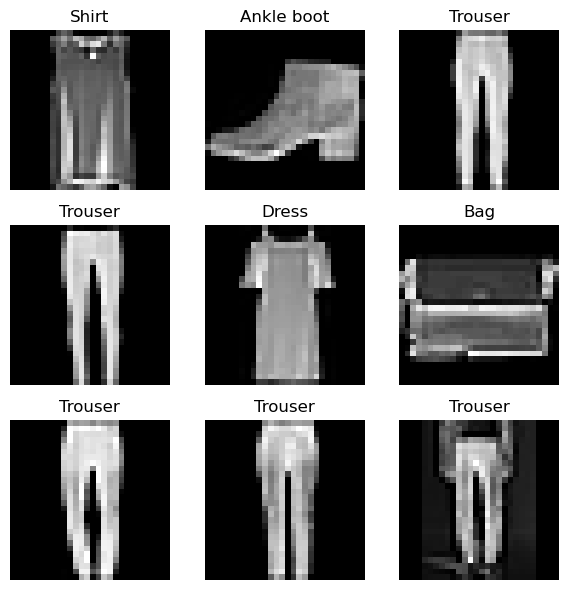

In [12]:

plt.figure(figsize=(6, 6))
for i in range(9): 
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
def build_cnn(input_shape=(28,28,1), num_classes=10):
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    return model


In [14]:
def plot_history(history, out_path_acc=None, out_path_loss=None):

    plt.figure()
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.legend()
    plt.title("Accuracy Curve")
    plt.savefig(out_path_acc)
    plt.close()

    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title("Loss Curve")
    plt.savefig(out_path_loss)
    plt.close()

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = build_cnn(input_shape=(28, 28, 1), num_classes=10)
OUTPUT_DIR = "../results"

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train)

callbacks = [
    EarlyStopping(patience=7, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint("../saved_model/best_model.h5", save_best_only=True),
    ReduceLROnPlateau(patience=2, factor=0.3, monitor="val_loss"),
]

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)
plot_history(history,
                 out_path_acc=os.path.join(OUTPUT_DIR, "accuracy_curve.png"),
                 out_path_loss=os.path.join(OUTPUT_DIR, "loss_curve.png")
                 )

print("Model saved successfully!")



C:\Users\c2d\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7011 - loss: 0.8346

844/844 ━━━━━━━━━━━━━━━━━━━━ 98s 111ms/step - accuracy: 0.7607 - loss: 0.6474 - val_accuracy: 0.8683 - val_loss: 0.3603 - learning_rate: 0.0010
Epoch 2/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8224 - loss: 0.4798

844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.8312 - loss: 0.4582 - val_accuracy: 0.8700 - val_loss: 0.3585 - learning_rate: 0.0010
Epoch 3/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8489 - loss: 0.4125

844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.8494 - loss: 0.4087 - val_accuracy: 0.8752 - val_loss: 0.3325 - learning_rate: 0.0010
Epoch 4/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8592 - loss: 0.3868

844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.8617 - loss: 0.3797 - val_accuracy: 0.9038 - val_loss: 0.2674 - learning_rate: 0.0010
Epoch 5/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 108ms/step - accuracy: 0.8660 - loss: 0.3632 - val_accuracy: 0.8840 - val_loss: 0.3157 - learning_rate: 0.0010
Epoch 6/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8691 - loss: 0.3568

844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 108ms/step - accuracy: 0.8725 - loss: 0.3475 - val_accuracy: 0.9108 - val_loss: 0.2446 - learning_rate: 0.0010
Epoch 7/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.8746 - loss: 0.3420 - val_accuracy: 0.9090 - val_loss: 0.2515 - learning_rate: 0.0010
Epoch 8/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 111ms/step - accuracy: 0.8817 - loss: 0.3256 - val_accuracy: 0.8930 - val_loss: 0.2799 - learning_rate: 0.0010
Epoch 9/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8897 - loss: 0.3038

844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.8915 - loss: 0.2971 - val_accuracy: 0.9127 - val_loss: 0.2410 - learning_rate: 3.0000e-04
Epoch 10/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8932 - loss: 0.2885

844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 107ms/step - accuracy: 0.8942 - loss: 0.2854 - val_accuracy: 0.9142 - val_loss: 0.2306 - learning_rate: 3.0000e-04
Epoch 11/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 106ms/step - accuracy: 0.8977 - loss: 0.2816 - val_accuracy: 0.8898 - val_loss: 0.3115 - learning_rate: 3.0000e-04
Epoch 12/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 108ms/step - accuracy: 0.8990 - loss: 0.2763 - val_accuracy: 0.8833 - val_loss: 0.3264 - learning_rate: 3.0000e-04
Epoch 13/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8991 - loss: 0.2778

844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 108ms/step - accuracy: 0.9010 - loss: 0.2704 - val_accuracy: 0.9225 - val_loss: 0.2116 - learning_rate: 9.0000e-05
Epoch 14/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 89s 105ms/step - accuracy: 0.9044 - loss: 0.2593 - val_accuracy: 0.9208 - val_loss: 0.2198 - learning_rate: 9.0000e-05
Epoch 15/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 89s 105ms/step - accuracy: 0.9039 - loss: 0.2647 - val_accuracy: 0.9128 - val_loss: 0.2381 - learning_rate: 9.0000e-05
Epoch 16/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.9052 - loss: 0.2611 - val_accuracy: 0.9173 - val_loss: 0.2262 - learning_rate: 2.7000e-05
Epoch 17/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 381s 452ms/step - accuracy: 0.9069 - loss: 0.2574 - val_accuracy: 0.9095 - val_loss: 0.2462 - learning_rate: 2.7000e-05
Epoch 18/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - accuracy: 0.9057 - loss: 0.2589 - val_accuracy: 0.9145 - val_loss: 0.2303 - learning_rate: 8.1000e-06
Epoch 19/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/s


Test Results:

Test Accuracy : 0.9133

Test Loss     : 0.2363

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.87      0.88      1000
           3       0.94      0.87      0.90      1000
           4       0.87      0.86      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.71      0.80      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



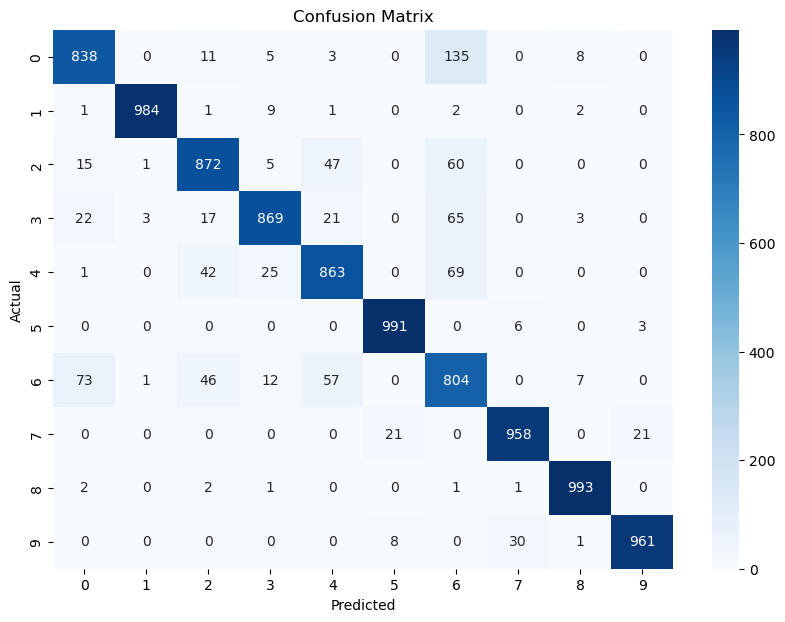

In [ ]:
MODEL_PATH = "../saved_model/best_model.h5"

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Results:")
print(f"\nTest Accuracy : {test_accuracy:.4f}")
print(f"\nTest Loss     : {test_loss:.4f}")

predictions = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(predictions, axis=1)

print("\nClassification Report")
print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../results/confusion_matrix.png")
plt.show()


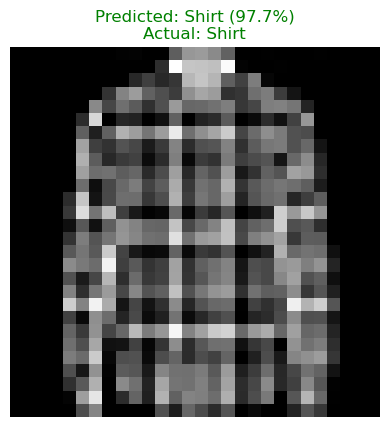

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
img_num = 7

plt.figure()
plt.imshow(x_test[img_num], cmap="gray")
plt.axis("off")

pred_label = np.argmax(predictions[img_num])
true_label = y_test[img_num]

color = "green" if pred_label == true_label else "red"
plt.title(
    f"Predicted: {class_names[pred_label]} "
    f"({100*np.max(predictions[img_num]):.1f}%)\n"
    f"Actual: {class_names[true_label]}",
    color=color
)
plt.savefig("../results/sample_prediction.png")
plt.show()

